### Итоговая работа.

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.optimize import minimize
%matplotlib inline

### Задание 1   
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [226]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).
   
b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [227]:
from sklearn.metrics.pairwise import pairwise_distances
pair = pairwise_distances(raitings, metric='cosine')
pair

array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224],
       [0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873],
       [0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949],
       [0.21659884, 0.15364663, 0.15330626, 0.        , 0.30846591,
        0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ],
       [0.18082368, 0.12861948, 0.21605701, 0.30846591, 0.        ,
        0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211],
       [0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092],
       [0.27264172, 0.17370316, 0.32383777, 0.16725789, 0.21799532,
        0.25988199, 0.        , 0.17330826, 0.18869956, 0.20845282],
       [0.19032478, 0.19973997, 0.2371044

In [228]:
### a
    
print(f' X  Y')                            
for i, n in zip(pair, range(1, 11)):
    x = []
    j =  np.where(i ==np.min(i[np.nonzero(i)]))
    x = (j[0][0] + 1, n)
    print(x)

 X  Y
(9, 1)
(5, 2)
(10, 3)
(10, 4)
(9, 5)
(10, 6)
(4, 7)
(6, 8)
(1, 9)
(3, 10)


In [229]:
### b

from sklearn import decomposition

pca = decomposition.PCA(n_components = 5)
raitings1= pca.fit_transform(raitings)
raitings1

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

### Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [230]:
from sympy import *
from scipy.misc import derivative

In [231]:
x, y = symbols('x y') 
expression = (tan(sin(x) + cos(2*x+3)))**2
a = diff(expression, x)
print(f"До диффиренцирования: {expression}")
print(a)

До диффиренцирования: tan(sin(x) + cos(2*x + 3))**2
2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))


In [232]:
def f(x):
    return (tan(sin(x) + cos(2*x + 3)))**2
derivative(f, 1.0, dx=1e-6)

55.3859176433136

### Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [233]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [234]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [235]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

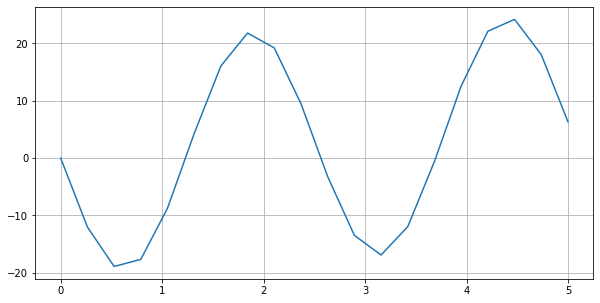

In [236]:
plt.figure(figsize=(10, 5))
plt.plot(x, fx)
plt.grid()
plt.show()

In [237]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [238]:
param = [0,0]
res = minimize(error, param , method = 'COBYLA')
res

     fun: 0.0767456611156554
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 135
  status: 1
 success: True
       x: array([ 3.00018796, -2.50008926])

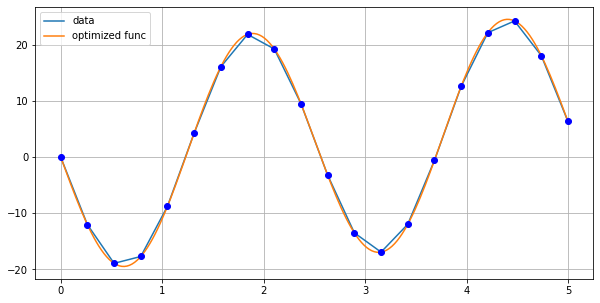

In [239]:
a = 3.00018796
b = -2.50008926
x_ = np.linspace(0, 5, 200)
plt.figure(figsize=(10, 5))
plt.plot(x, fx,label='data')
plt.plot(x_, f(x_, a, b), label='optimized func')
plt.plot(x, fx, 'o', color='b')
plt.legend()
plt.grid()
plt.show()

### Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [240]:
random_value = np.random.randint(20, high=1001, size=20, dtype='l')
random_value

array([234, 636, 780, 432, 160, 579, 521, 877, 781, 172, 408, 725, 890,
       912, 621, 692,  84, 133, 622, 727])

In [241]:
mean_list = []
for i in range(1000):
    sampling = np.random.choice(random_value, 50)
    mean_list.append(np.mean(sampling))

<function matplotlib.pyplot.show(close=None, block=None)>

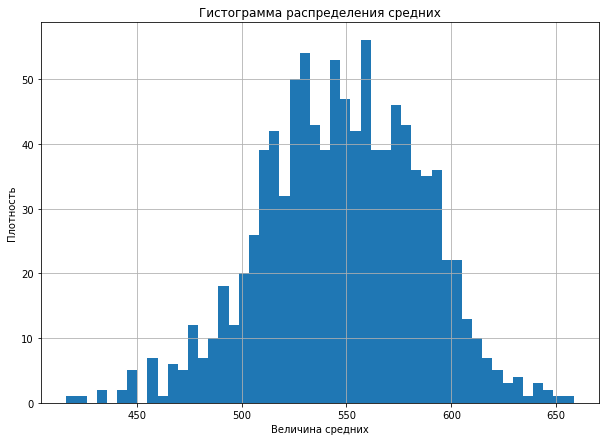

In [242]:
fig, axes = plt.subplots(figsize = (10, 7))
plt.title('Гистограмма распределения средних')
axes.set_xlabel('Величина средних')
axes.set_ylabel('Плотность')
axes.hist(mean_list, bins = 50)
plt.grid()
plt.show

### Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):
   
m = np.array([[1, 4],   
              [1, 1]])   
print(m)   

In [243]:
m = np.array([[1, 4],
              [1, 1]])

v, w = np.linalg.eig(m)

print(f"Собственные вектора матрицы {w}")
print(f"Собственные значения матрицы {v}")

Собственные вектора матрицы [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]
Собственные значения матрицы [ 3. -1.]
